## Deploying CNTK to Azure Container

Original write-up by Raymond: 

[https://github.com/Azure/Spark-Operationalization-On-Azure/blob/master/samples/cntk/tutorials/realtime/image_classification.md](https://github.com/Azure/Spark-Operationalization-On-Azure/blob/master/samples/cntk/tutorials/realtime/image_classification.md)

### Why is this just great?

1. One-click deploy of DNN! Get all of our git-repo DNNs up as a web-service ...
    ```
    aml service create realtime -r cntk-py -f driver.py -m ResNet_152.model -d synset.txt -n demoservice
    ```
   
2. Using docker-containers we can run locally first (to debug with logs)
    ```
    aml env local
    ```
    
3. Docker-containers in general mean we don't have to worry about dependencies and whether it will work in a remote environment (as long as it works locally)

4. Kubernetes support comming soon ... potentially deploy to a GPU cluster in the same way (just toggle option)

In [1]:
# Run the below as root on on your DSVM
# They will install latest azuremlcli & configure docker:

#!wget -q http://amlsamples.blob.core.windows.net/scripts/amlupdate.sh -O - | sudo bash -
#!sudo /opt/microsoft/azureml/initial\_setup.sh

In [2]:
!aml env setup --name iliacontainerv2

Setting up your Azure ML environment with a storage account, ACR registry and ACS cluster.
{
  "environmentName": "AzureCloud",
  "id": "1ba81249-8edd-4619-a486-3d28a2176aad",
  "isDefault": true,
  "name": "Azure Internal - London",
  "state": "Enabled",
  "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47",
  "user": {
    "name": "ilkarman@microsoft.com",
    "type": "user"
  }
}
Creating resource group iliacontainerv2rg.
Registering is still on-going. You can monitor using 'az provider show -n Microsoft.Storage'
Creating storage account iliacontainerv2stor.
Registering is still on-going. You can monitor using 'az provider show -n Microsoft.ContainerRegistry'
Creating ACR registry: iliacontainerv2acr (please be patient, this can take several minutes)
Started ACS deployment. Please note that it can take up to 15 minutes to complete the deployment.
You can continue to work with aml in local mode while the ACS is being provisioned.
To check the status of the deployment, run 'aml env set

In [37]:
!aml env setup -s iliacontainerv2rgacsdeployment20170322114132

{
  "environmentName": "AzureCloud",
  "id": "1ba81249-8edd-4619-a486-3d28a2176aad",
  "isDefault": true,
  "name": "Azure Internal - London",
  "state": "Enabled",
  "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47",
  "user": {
    "name": "ilkarman@microsoft.com",
    "type": "user"
  }
}
ACS deployment succeeded.
ACS Master URL     : iliacontainerv2acsmaster.eastus.cloudapp.azure.com
ACS Agent URL      : iliacontainerv2acsagent.eastus.cloudapp.azure.com
ACS admin username : acsadmin (Needed to set up port forwarding in cluster mode).
To configure aml with this environment, set the following environment variables.
 export AML_ACS_MASTER='iliacontainerv2acsmaster.eastus.cloudapp.azure.com'
 export AML_ACS_AGENT='iliacontainerv2acsagent.eastus.cloudapp.azure.com'
You can also find these settings saved in /home/iliauk/.amlenvrc

To switch to cluster mode, run 'aml env cluster'.


In [38]:
!cat ~/.amlenvrc

export AML_STORAGE_ACCT_NAME='iliacontainerv2stor'
export AML_STORAGE_ACCT_KEY='UwIevktppvN1NQG7qKzwJQ3eCtFeSptHQchwbbX5XC3TqFh+Ix9b5ZplSpsQzXc+VG+KrAt4FKK6DXbwO3ZfzA=='
export AML_ACR_HOME='iliacontainerv2acr.azurecr.io'
export AML_ACR_USER='iliacontainerv2acr'
export AML_ACR_PW='jDuC++4=+GDTqQ/T=myAYdx5=cfm40fU'
export AML_ACS_MASTER='iliacontainerv2acsmaster.eastus.cloudapp.azure.com'
export AML_ACS_AGENT='iliacontainerv2acsagent.eastus.cloudapp.azure.com'


In [50]:
import wget

In [51]:
# Model
wget.download("https://ikcompuvision.blob.core.windows.net/acs/ResNet_18.model")
wget.download("https://migonzastorage.blob.core.windows.net/deep-learning/models/cntk/imagenet/ResNet_152.model")
# Labels
wget.download("https://ikcompuvision.blob.core.windows.net/acs/synset.txt")
# Python script (driver) (modify load model from _18 to _152)
wget.download("https://ikcompuvision.blob.core.windows.net/acs/driver.py")

'driver.py'

In [39]:
# Deploy (local first)
!source ~/.amlenvrc;aml env local


** Warning: Running in local mode. **
To switch to cluster mode: aml env cluster

Storage account name   : iliacontainerv2stor
Storage account key    : UwIevktppvN1NQG7qKzwJQ3eCtFeSptHQchwbbX5XC3TqFh+Ix9b5ZplSpsQzXc+VG+KrAt4FKK6DXbwO3ZfzA==
ACR URL                : iliacontainerv2acr.azurecr.io
ACR username           : iliacontainerv2acr
ACR password           : jDuC++4=+GDTqQ/T=myAYdx5=cfm40fU


In [41]:
!source ~/.amlenvrc;aml service create realtime -r cntk-py -f driver.py -m ResNet_152.model -d synset.txt -n cntkservice

Uploading dependencies.
 ResNet_152.model
 synset.txt
 /anaconda/envs/py35/lib/python3.5/site-packages/azuremlcli/azuremlutilities.py
Creating docker image...........................done.
Image available at : iliacontainerv2acr.azurecr.io/cntkservice
[Local mode] Running docker container.
Unable to find image 'iliacontainerv2acr.azurecr.io/cntkservice:latest' locally
latest: Pulling from cntkservice
d54efb8db41d: Already exists
f8b845f45a87: Already exists
e8db7bf7c39f: Already exists
9654c40e9079: Already exists
6d9ef359eaaa: Already exists
31cbc1a1cf2e: Already exists
e54de2b465f6: Already exists
526aa1857ae1: Already exists
7266e8762dc5: Already exists
4f1135f0b8e2: Already exists
4cd740e2fdfd: Already exists
7e4957753e69: Pulling fs layer
7e4957753e69: Verifying Checksum
7e4957753e69: Download complete
7e4957753e69: Pull complete
Digest: sha256:05a34a6d5cb66d6160351a05ff238af035b5d2e62c18b2815c8a8eab27403444
Status: Downloaded newer image for iliacontainerv2acr.azurecr.io/cntkservi

## Score Image using ACS (local)

In [42]:
localurl = 'http://127.0.0.1:32768/score'

In [43]:
import base64
import urllib
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from io import BytesIO
%matplotlib inline

In [44]:
IMAGEURL = "https://www.britishairways.com/assets/images/information/about-ba/fleet-facts/airbus-380-800/photo-gallery/240x295-BA-A380-exterior-2-high-res.jpg"

'{"input": "[\\"iVBORw0KGgoAAAANSUhEUgAAAOAAAADgCAIAAACVT/22AAEAAElEQVR4nMz9edRkyXUfBt4l4i2Z+a311b70vg'

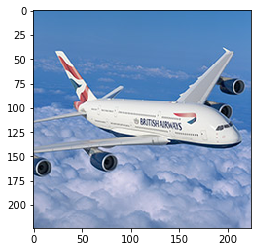

In [45]:
def url_img_to_json_img(url):
    bytfile = BytesIO(urllib.urlopen(url).read())
    img = Image.open(bytfile).convert('RGB')  # 3 Channels
    img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)  # Fixed size 
    plt.imshow(img)
    imgio = BytesIO()
    img.save(imgio, 'PNG')
    imgio.seek(0)
    dataimg = base64.b64encode(imgio.read())
    return json.dumps(
        {'input':'[\"{0}\"]'.format(dataimg.decode('utf-8'))})

jsonimg = url_img_to_json_img(IMAGEURL)
jsonimg[:100]  # Example of json string

In [46]:
headers = {'content-type': 'application/json',
           'X-Marathon-App-Id': '/demoservice'}

In [47]:
%time r = requests.post(localurl, data=jsonimg, headers=headers)

CPU times: user 2.98 ms, sys: 2.34 ms, total: 5.32 ms
Wall time: 2.91 s


In [51]:
r.json()  # Result

{u'result': [[[[u'airliner', 1639.3054962158203],
    [u'wing', 1492.4062728881836],
    [u'space shuttle', 1439.7224426269531]]],
  u'Computed in 2892.64 ms']}

## Score Image using ACS (cluster)

In [61]:
# Have to run this via terminal ... (possible to change?)
#!source ~/.amlenvrc; aml env cluster

In [64]:
!source ~/.amlenvrc; aml service create realtime -r cntk-py -f driver.py -m ResNet_152.model -d synset.txt -n demoservice

Uploading dependencies.
 ResNet_152.model
 synset.txt
 /anaconda/envs/py35/lib/python3.5/site-packages/azuremlcli/azuremlutilities.py
Creating docker image.........done.
Image available at : iliacontainerv2acr.azurecr.io/demoservice
Deployment id: f04e9acc-1cf2-497b-b0b4-cb52f390ab1f
Success.
Usage: aml service run realtime -n demoservice [-d '{"input" : "!! YOUR DATA HERE !!"}']


In [86]:
CLUSTER_URL = 'http://iliacontainerv2acsagent.eastus.cloudapp.azure.com/score'

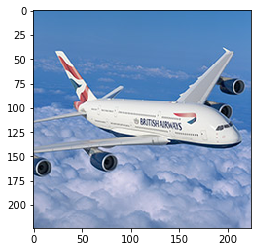

In [87]:
IMAGEURL = "https://www.britishairways.com/assets/images/information/about-ba/fleet-facts/airbus-380-800/photo-gallery/240x295-BA-A380-exterior-2-high-res.jpg"
jsonimg = url_img_to_json_img(IMAGEURL)

In [88]:
%time r = requests.post(CLUSTER_URL, data=jsonimg, headers=headers)

CPU times: user 3.6 ms, sys: 0 ns, total: 3.6 ms
Wall time: 994 ms


In [89]:
str(r.json()['result'][0][0][0][0]) # Result

'airliner'

## Another Example

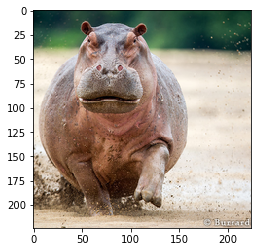

In [90]:
IMAGEURL = 'http://img.burrard-lucas.com/zambia/full/hippo_charge.jpg'
jsonimg = url_img_to_json_img(IMAGEURL)

In [91]:
%time r = requests.post(CLUSTER_URL, data=jsonimg, headers=headers)

CPU times: user 3.28 ms, sys: 1.1 ms, total: 4.38 ms
Wall time: 950 ms


In [92]:
str(r.json()['result'][0][0][0][0]) # Result

'hippopotamus'